## Import Libraries

In [1]:
import random                     
import math
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score
from numpy import argmax
from numpy import array
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle
import warnings
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA
warnings.filterwarnings("ignore")
# from sklearn.linear_model import LinearRegression
from sklearn import metrics

## Load Data

In [2]:
#Reading a csv file
df = pd.read_csv('LifeExpectancyData.csv')

In [3]:
df.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


## Explotary Data Analysis


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
Country                     2938 non-null object
Year                        2938 non-null int64
Status                      2938 non-null object
Life_Expectancy             2928 non-null float64
Adult_Mortality             2928 non-null float64
Infant_Deaths               2938 non-null int64
Alcohol                     2744 non-null float64
Percentage_Exp              2938 non-null float64
HepatitisB                  2385 non-null float64
Measles                     2938 non-null int64
BMI                         2904 non-null float64
Under_Five_Deaths           2938 non-null int64
Polio                       2919 non-null float64
Tot_Exp                     2712 non-null float64
Diphtheria                  2919 non-null float64
HIV/AIDS                    2938 non-null float64
GDP                         2490 non-null float64
Population                  2286 non-null float64
thi

In [5]:
df.head(10)

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
5,Afghanistan,2010,Developing,58.8,279.0,74,0.01,79.679367,66.0,1989,...,66.0,9.20,66.0,0.1,553.328940,2883167.0,18.4,18.4,0.448,9.2
6,Afghanistan,2009,Developing,58.6,281.0,77,0.01,56.762217,63.0,2861,...,63.0,9.42,63.0,0.1,445.893298,284331.0,18.6,18.7,0.434,8.9
7,Afghanistan,2008,Developing,58.1,287.0,80,0.03,25.873925,64.0,1599,...,64.0,8.33,64.0,0.1,373.361116,2729431.0,18.8,18.9,0.433,8.7
8,Afghanistan,2007,Developing,57.5,295.0,82,0.02,10.910156,63.0,1141,...,63.0,6.73,63.0,0.1,369.835796,26616792.0,19.0,19.1,0.415,8.4
9,Afghanistan,2006,Developing,57.3,295.0,84,0.03,17.171518,64.0,1990,...,58.0,7.43,58.0,0.1,272.563770,2589345.0,19.2,19.3,0.405,8.1


In [6]:
df.rename(columns={" BMI ":"BMI","Life expectancy ":"Life_Expectancy","Adult Mortality":"Adult_Mortality",
                   "infant deaths":"Infant_Deaths","percentage expenditure":"Percentage_Exp","Hepatitis B":"HepatitisB",
                  "Measles ":"Measles"," BMI ":"BMI","under-five deaths ":"Under_Five_Deaths","Diphtheria ":"Diphtheria",
                  " HIV/AIDS":"HIV/AIDS"," thinness  1-19 years":"thinness_1to19_years"," thinness 5-9 years":"thinness_5to9_years","Income composition of resources":"Income_Comp_Of_Resources",
                   "Total expenditure":"Tot_Exp"},inplace=True)

In [7]:
df.columns

Index(['Country', 'Year', 'Status', 'Life_Expectancy', 'Adult_Mortality',
       'Infant_Deaths', 'Alcohol', 'Percentage_Exp', 'HepatitisB', 'Measles',
       'BMI', 'Under_Five_Deaths', 'Polio', 'Tot_Exp', 'Diphtheria',
       'HIV/AIDS', 'GDP', 'Population', 'thinness_1to19_years',
       'thinness_5to9_years', 'Income_Comp_Of_Resources', 'Schooling'],
      dtype='object')

In [8]:
df.shape

(2938, 22)

### Data Visualization

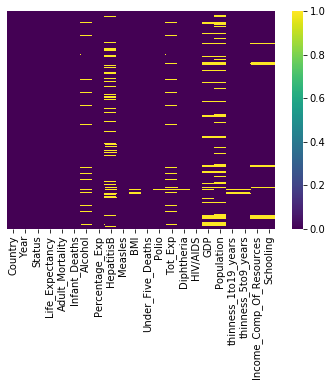

In [10]:
#Visualize missing data in the dataset
sns.heatmap(df.isnull(),cbar=True ,yticklabels=False,cmap = 'viridis')

In [11]:
#no. of null values in each column
df.isnull().sum()

Country                       0
Year                          0
Status                        0
Life_Expectancy              10
Adult_Mortality              10
Infant_Deaths                 0
Alcohol                     194
Percentage_Exp                0
HepatitisB                  553
Measles                       0
BMI                          34
Under_Five_Deaths             0
Polio                        19
Tot_Exp                     226
Diphtheria                   19
HIV/AIDS                      0
GDP                         448
Population                  652
thinness_1to19_years         34
thinness_5to9_years          34
Income_Comp_Of_Resources    167
Schooling                   163
dtype: int64

In [12]:
# Identify percentage of null values in each column.
df.isnull().sum()*100/df.isnull().count()

Country                      0.000000
Year                         0.000000
Status                       0.000000
Life_Expectancy              0.340368
Adult_Mortality              0.340368
Infant_Deaths                0.000000
Alcohol                      6.603131
Percentage_Exp               0.000000
HepatitisB                  18.822328
Measles                      0.000000
BMI                          1.157250
Under_Five_Deaths            0.000000
Polio                        0.646698
Tot_Exp                      7.692308
Diphtheria                   0.646698
HIV/AIDS                     0.000000
GDP                         15.248468
Population                  22.191967
thinness_1to19_years         1.157250
thinness_5to9_years          1.157250
Income_Comp_Of_Resources     5.684139
Schooling                    5.547992
dtype: float64

In [13]:
df.columns =['Country','Year','Status','Life_Expectancy','Adult_Mortality','Infant_Deaths','Alcohol','Per_Expd','HepatitisB','Measles','BMI','Under5_Deaths','Polio','Tot_Exp','Diphtheria','HIV','GDP','Population','thinness_1to19_years','thinness_5to9_years','Income_Comp_Of_Resources','Schooling']

In [14]:
print(df.Life_Expectancy[df.Life_Expectancy<0].count())
print(df.Life_Expectancy[df.Life_Expectancy==0].count())
print(df.Life_Expectancy.isnull().sum())

0
0
10


In [15]:
Life_mean = df.Life_Expectancy.mean()
df.Life_Expectancy.fillna(value = Life_mean,inplace=True)

In [16]:
print(df.Adult_Mortality[df.Adult_Mortality<0].count())
print(df.Adult_Mortality[df.Adult_Mortality==0].count())
print(df.Adult_Mortality.isnull().sum())

0
0
10


In [17]:
AM_mean = df.Adult_Mortality.mean()
df.Adult_Mortality.fillna(value = AM_mean,inplace=True)

In [18]:
print(df.Alcohol[df.Alcohol<0].count())
print(df.Alcohol[df.Alcohol==0].count())
print(df.Alcohol.isnull().sum())

0
0
194


In [19]:
Alc_mean = df.Alcohol.mean()
df.Alcohol.fillna(value = Alc_mean,inplace=True)

In [20]:
print(df.HepatitisB[df.HepatitisB<0].count())
print(df.HepatitisB[df.HepatitisB==0].count())
print(df.HepatitisB.isnull().sum())

0
0
553


In [21]:
HB_mean = df.HepatitisB.mean()
df.HepatitisB.fillna(value = HB_mean,inplace=True)

In [22]:
print(df.BMI[df.BMI<0].count())
print(df.BMI[df.BMI==0].count())
print(df.BMI.isnull().sum())

0
0
34


In [23]:
BMI_mean = df.BMI.mean()
df.BMI.fillna(value = BMI_mean,inplace=True)

In [24]:
print(df.Polio[df.Polio<0].count())
print(df.Polio[df.Polio==0].count())
print(df.Polio.isnull().sum())

0
0
19


In [25]:
Pol_mean = df.Polio.mean()
df.Polio.fillna(value = Pol_mean,inplace=True)

In [26]:
print(df.Tot_Exp[df.Tot_Exp<0].count())
print(df.Tot_Exp[df.Tot_Exp==0].count())
print(df.Tot_Exp.isnull().sum())

0
0
226


In [27]:
TE_mean = df.Tot_Exp.mean()
df.Tot_Exp.fillna(value = TE_mean,inplace=True)

In [28]:
print(df.Diphtheria[df.Diphtheria<0].count())
print(df.Diphtheria[df.Diphtheria==0].count())
print(df.Diphtheria.isnull().sum())

0
0
19


In [29]:
Diph_mean = df.Diphtheria.mean()
df.Diphtheria.fillna(value = Diph_mean,inplace=True)

In [30]:
print(df.GDP[df.GDP<0].count())
print(df.GDP[df.GDP==0].count())
print(df.GDP.isnull().sum())

0
0
448


In [31]:
GDP_mean = df.GDP.mean()
df.GDP.fillna(value = GDP_mean,inplace=True)

In [32]:
print(df.Population[df.Population<0].count())
print(df.Population[df.Population==0].count())
print(df.Population.isnull().sum())

0
0
652


In [33]:
pop_mean = df.Population.mean()
df.Population.fillna(value = pop_mean,inplace=True)

In [34]:
print(df.thinness_1to19_years[df.thinness_1to19_years<0].count())
print(df.thinness_1to19_years[df.thinness_1to19_years==0].count())
print(df.thinness_1to19_years.isnull().sum())

0
0
34


In [35]:
th1to19_mean = df.thinness_1to19_years.mean()
df.thinness_1to19_years.fillna(value = th1to19_mean,inplace=True)

In [36]:
print(df.thinness_5to9_years[df.thinness_5to9_years<0].count())
print(df.thinness_5to9_years[df.thinness_5to9_years==0].count())
print(df.thinness_5to9_years.isnull().sum())

0
0
34


In [37]:
th5to9_mean = df.thinness_5to9_years.mean()
df.thinness_5to9_years.fillna(value = th5to9_mean,inplace=True)

In [38]:
print(df.Income_Comp_Of_Resources[df.Income_Comp_Of_Resources<0].count())
print(df.Income_Comp_Of_Resources[df.Income_Comp_Of_Resources==0].count())
print(df.Income_Comp_Of_Resources.isnull().sum())

0
130
167


In [39]:
in_mean = df.Income_Comp_Of_Resources.mean()
df.Income_Comp_Of_Resources.fillna(value = in_mean,inplace=True)

In [40]:
print(df.Schooling[df.Schooling<0].count())
print(df.Schooling[df.Schooling==0].count())
print(df.Schooling.isnull().sum())

0
28
163


In [41]:
sch_mean = df.Schooling.mean()
df.Schooling.fillna(value = sch_mean,inplace=True)

In [42]:
print(df.Infant_Deaths[df.Infant_Deaths<0].count())

0


In [43]:
print(df.Under5_Deaths[df.Under5_Deaths<0].count())

0


In [44]:
df.groupby('Country').size()

Country
Afghanistan                           16
Albania                               16
Algeria                               16
Angola                                16
Antigua and Barbuda                   16
                                      ..
Venezuela (Bolivarian Republic of)    16
Viet Nam                              16
Yemen                                 16
Zambia                                16
Zimbabwe                              16
Length: 193, dtype: int64

In [45]:
country_list = df.Country.unique()
fill_list = ['Life_Expectancy','Adult_Mortality','Alcohol','HepatitisB','BMI','Polio','Tot_Exp','Diphtheria','GDP','Population','thinness_1to19_years','thinness_5to9_years','Income_Comp_Of_Resources','Schooling']

In [46]:
# to interpolate the missing values 
# df.interpolate(method ='cubic', limit_direction ='both')

In [47]:
# # Treat null values using interpolation.
# for country in country_list:
#     df.loc[df['Country'] == country,fill_list] = df.loc[df['Country'] == country,fill_list].interpolate()
    
# # Drop remaining null values after interpolation.
# df.dropna(inplace=True)

In [48]:
# Verifying null-values after applying above methods.
df.isnull().sum()

Country                     0
Year                        0
Status                      0
Life_Expectancy             0
Adult_Mortality             0
Infant_Deaths               0
Alcohol                     0
Per_Expd                    0
HepatitisB                  0
Measles                     0
BMI                         0
Under5_Deaths               0
Polio                       0
Tot_Exp                     0
Diphtheria                  0
HIV                         0
GDP                         0
Population                  0
thinness_1to19_years        0
thinness_5to9_years         0
Income_Comp_Of_Resources    0
Schooling                   0
dtype: int64

In [49]:
# Create a dictionary of columns.
col_dict = {'Life_Expectancy':1,'Adult_Mortality':2,'Infant_Deaths':3,'Alcohol':4,'Percentage_Exp':5,'HepatitisB':6,'Measles':7,'BMI':8,'Under_Five_Deaths':9,'Polio':10,'Tot_Exp':11,'Diphtheria':12,'HIV/AIDS':13,'GDP':14,'Population':15,'thinness_1to19_years':16,'thinness_5to9_years':17,'Income_Comp_Of_Resources':18,'Schooling':19}


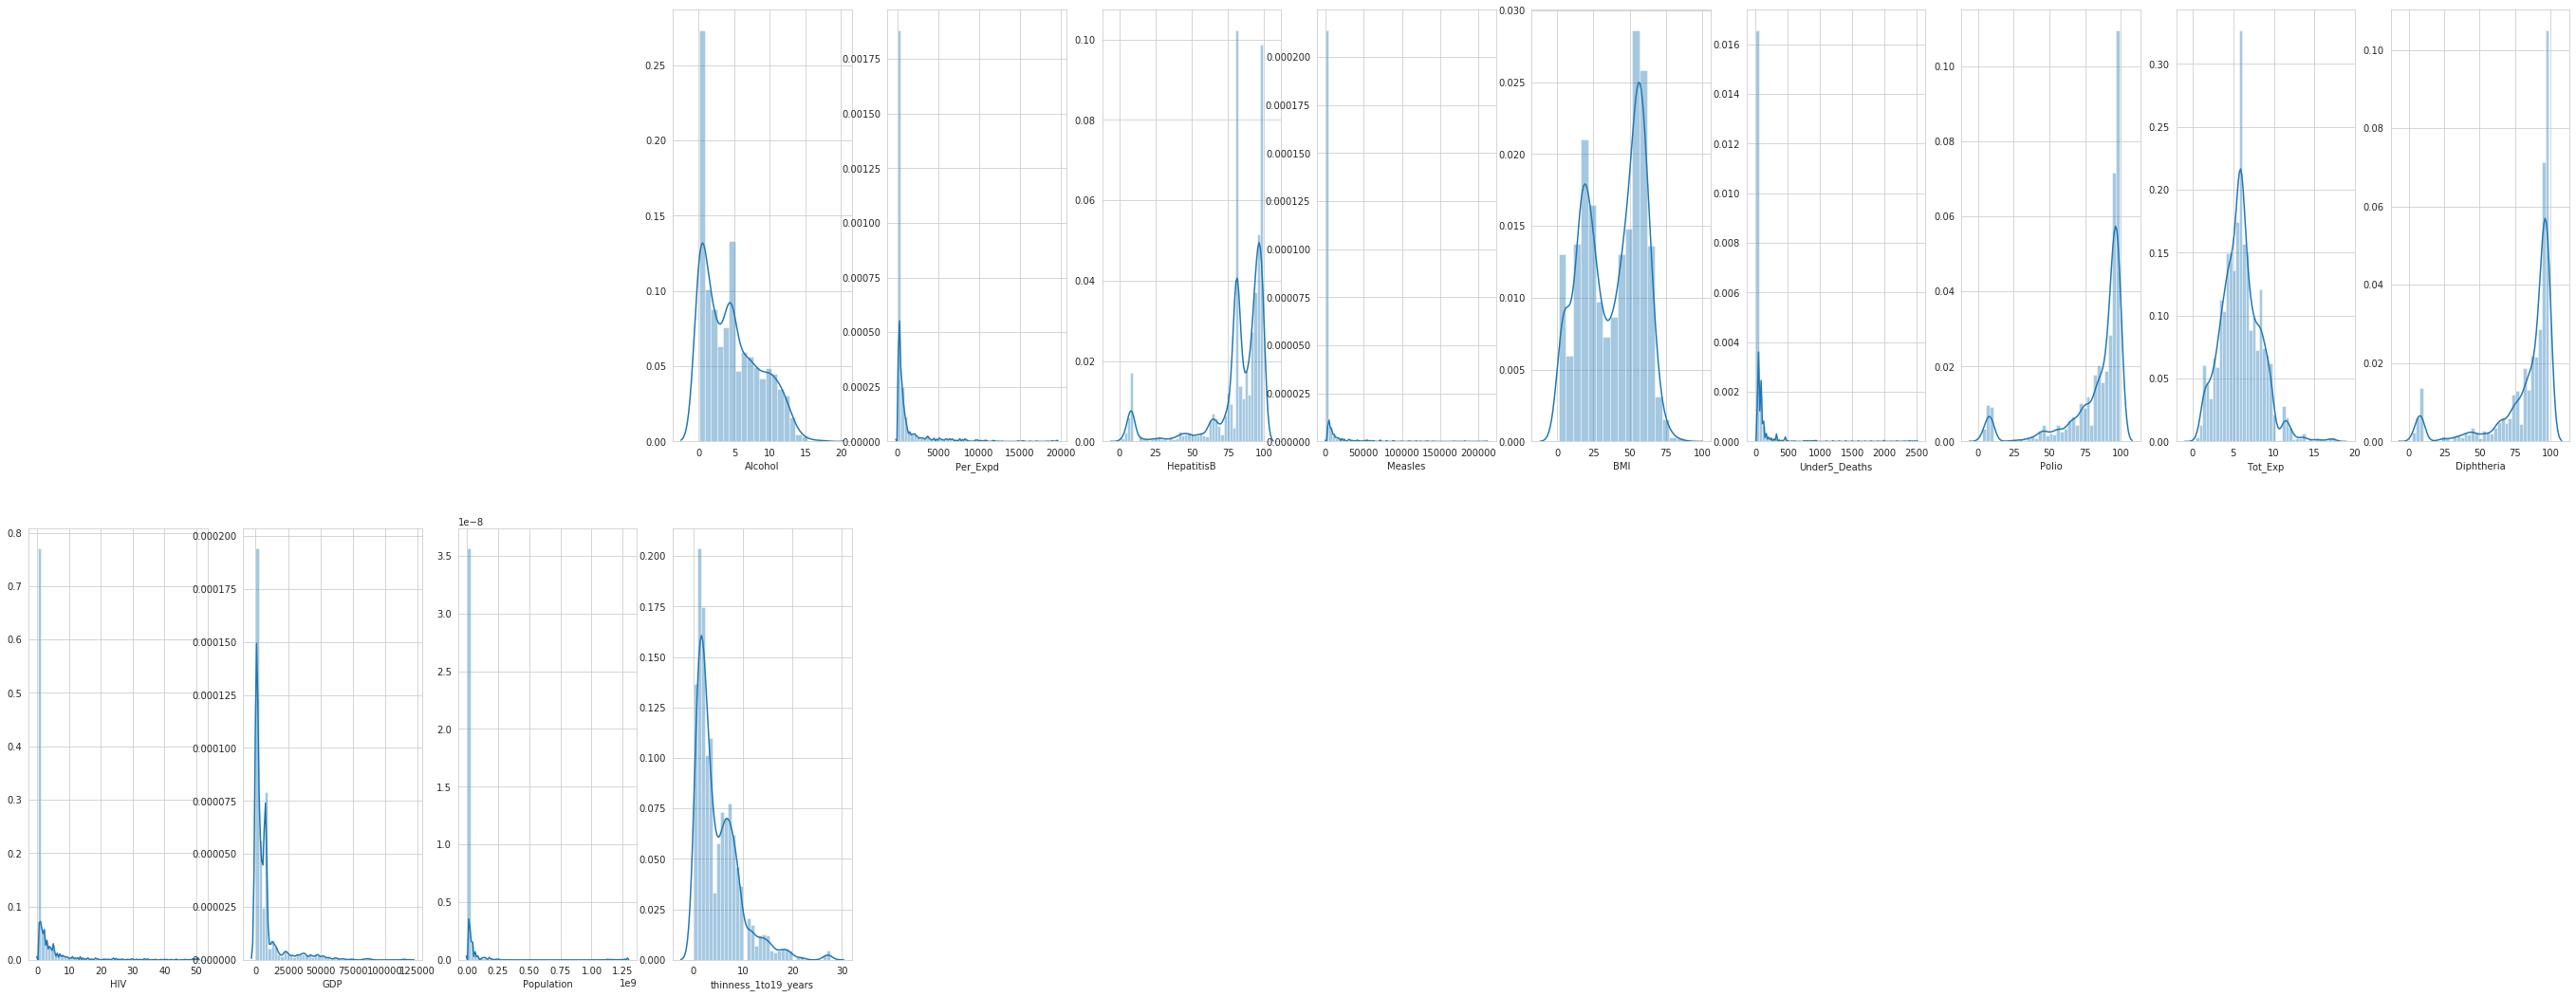

In [53]:
#Check Distribution Skewness
#Check Outliers
l = df.columns[3:19].values
plt.figure(figsize=(4*number_of_columns,10*number_of_rows))
for i in range(3,len(l)):
    plt.subplot(number_of_rows + 1,number_of_columns,i+1)
    sns.distplot(df[l[i]],kde=True) 

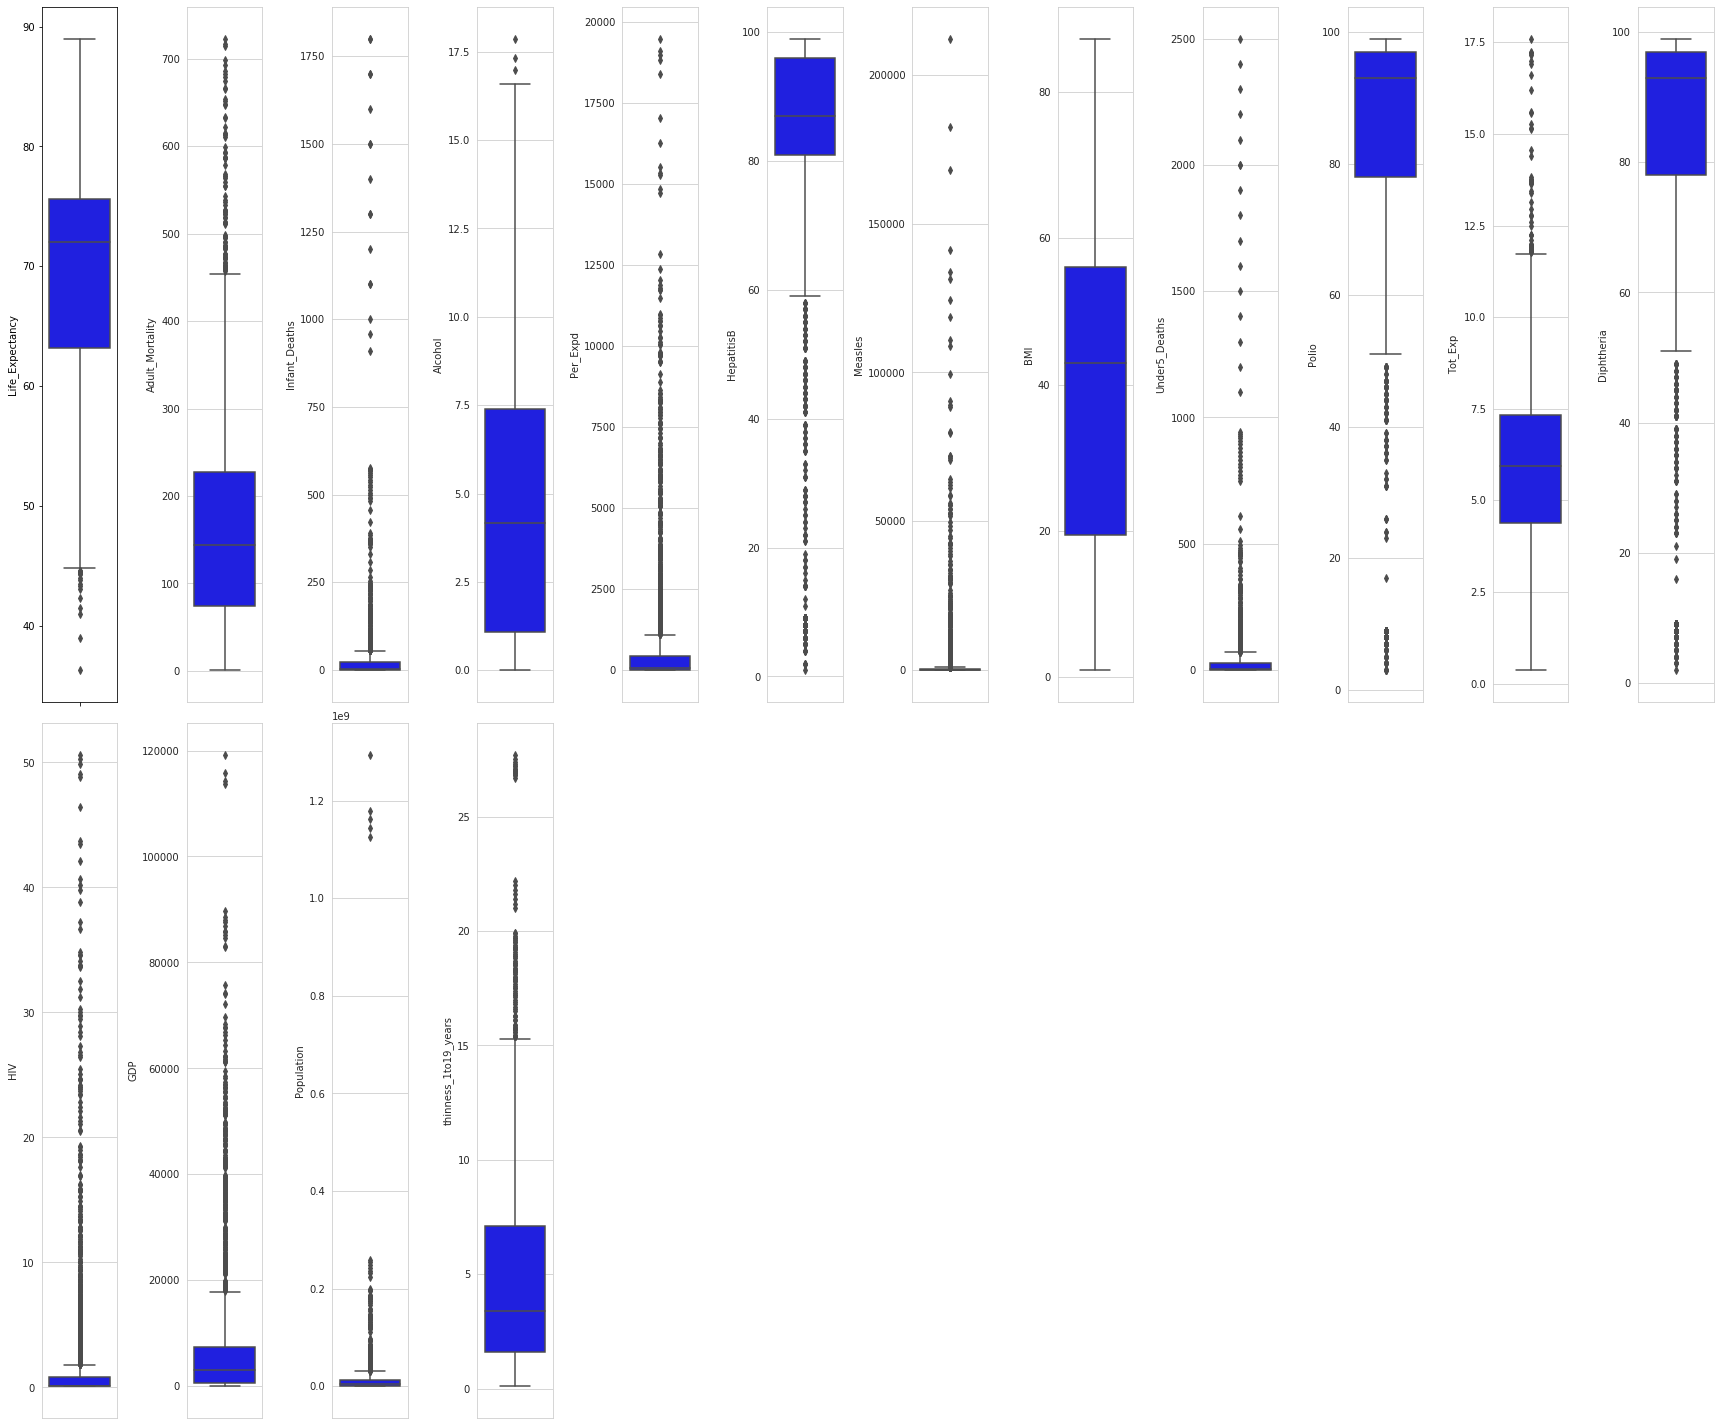

In [51]:
number_of_columns=12
number_of_rows = len(l)-1/number_of_columns
plt.figure(figsize=(2*number_of_columns,10*number_of_rows))
for i in range(0,len(l)):
    plt.subplot(number_of_rows + 1,number_of_columns,i+1)
    sns.set_style('whitegrid')
    sns.boxplot(df[l[i]],color='blue',orient='v')
    plt.tight_layout()

In [52]:
# Plotting the correlation matrix
# values close to 1 indicate strong positive correlation,close to -1 indicate strong negative correlation
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,Year,Life_Expectancy,Adult_Mortality,Infant_Deaths,Alcohol,Per_Expd,HepatitisB,Measles,BMI,Under5_Deaths,Polio,Tot_Exp,Diphtheria,HIV,GDP,Population,thinness_1to19_years,thinness_5to9_years,Income_Comp_Of_Resources,Schooling
Year,1,0.169623,-0.0788608,-0.0374149,-0.0481676,0.0314,0.0893983,-0.082493,0.108327,-0.042937,0.0938196,0.0818601,0.133853,-0.139741,0.0933508,0.0149506,-0.0475921,-0.0506267,0.236333,0.203471
Life_Expectancy,0.169623,1,-0.696359,-0.196535,0.391598,0.381791,0.203771,-0.157574,0.559255,-0.222503,0.461574,0.207981,0.475418,-0.556457,0.430493,-0.0196377,-0.472162,-0.466629,0.692483,0.715066
Adult_Mortality,-0.0788608,-0.696359,1,0.0787471,-0.190408,-0.242814,-0.138591,0.031174,-0.381449,0.0941351,-0.272694,-0.110875,-0.273014,0.523727,-0.277053,-0.0125015,0.299863,0.305366,-0.440062,-0.435108
Infant_Deaths,-0.0374149,-0.196535,0.0787471,1,-0.113812,-0.0856122,-0.178783,0.501128,-0.22722,0.996629,-0.170674,-0.126564,-0.175156,0.0252313,-0.107109,0.548522,0.46559,0.471228,-0.143663,-0.191757
Alcohol,-0.0481676,0.391598,-0.190408,-0.113812,1,0.339634,0.0754471,-0.051055,0.31807,-0.110777,0.213744,0.294898,0.215242,-0.0486497,0.318591,-0.0307647,-0.416946,-0.405881,0.416099,0.497546
Per_Expd,0.0314,0.381791,-0.242814,-0.0856122,0.339634,1,0.0116793,-0.0565957,0.228537,-0.0878523,0.147203,0.173414,0.14357,-0.0978568,0.88814,-0.0246482,-0.25119,-0.252725,0.380374,0.388105
HepatitisB,0.0893983,0.203771,-0.138591,-0.178783,0.0754471,0.0116793,1,-0.0903169,0.134929,-0.184413,0.408519,0.0500843,0.499958,-0.102405,0.0623176,-0.109811,-0.105144,-0.108334,0.150992,0.171755
Measles,-0.082493,-0.157574,0.031174,0.501128,-0.051055,-0.0565957,-0.0903169,1,-0.175925,0.507809,-0.136146,-0.104569,-0.141861,0.0308987,-0.0680596,0.23625,0.224742,0.221007,-0.115764,-0.122609
BMI,0.108327,0.559255,-0.381449,-0.22722,0.31807,0.228537,0.134929,-0.175925,1,-0.237586,0.282156,0.231814,0.281059,-0.243548,0.276645,-0.0632376,-0.532025,-0.538911,0.479837,0.508105
Under5_Deaths,-0.042937,-0.222503,0.0941351,0.996629,-0.110777,-0.0878523,-0.184413,0.507809,-0.237586,1,-0.188703,-0.128269,-0.195651,0.0380615,-0.11064,0.535864,0.467626,0.472099,-0.161533,-0.207111


In [54]:
round(df[['Status','Life_Expectancy']].groupby(['Status']).mean(),2)


,Life_Expectancy
Status,
Developed,79.20
Developing,67.12


In [55]:
# Finding the significance of difference of Average_Life_Expectancy between Developed and Developing countries using 
# t-test
import scipy.stats as stats
stats.ttest_ind(df.loc[df['Status']=='Developed','Life_Expectancy'],df.loc[df['Status']=='Developing','Life_Expectancy'])
#p value is < 0.05
#Hence, the difference of Average_Life_Expectancy between Developed and Developing countries is significant. We can consider 'Status' as a feature as it is related to Life Expectancy.

Ttest_indResult(statistic=29.805188781530223, pvalue=9.034938663789684e-171)

In [56]:
# Convert categorical values to numerical values using one-hot encoding for 'Status' feature.
feature_df = pd.concat([feature_df,pd.get_dummies(feature_df['Status'],drop_first=True)],axis=1)
final = feature_df.drop('Status',axis=1)
final.head(120)

NameError: name 'feature_df' is not defined

In [57]:
# df_win_num = pd.concat([df_win_num,pd.get_dummies(df_win_num['Status'],drop_first=True)],axis=1)
# df_win_num_final = df_win_num.drop('Status',axis=1)

In [58]:
# df_win_num.head(5)

### Normalisation

In [59]:
# l = df.columns[3:19].values
num_df = df[['Life_Expectancy','Adult_Mortality','Infant_Deaths','Alcohol','Per_Expd','HepatitisB','Measles','BMI','Under5_Deaths','Polio','Tot_Exp','Diphtheria','HIV','GDP','Population','thinness_1to19_years','thinness_5to9_years','Income_Comp_Of_Resources','Schooling']].copy()
# num_df.drop(columns=['Measles'])
# del num_df['Measles']
num_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 19 columns):
Life_Expectancy             2938 non-null float64
Adult_Mortality             2938 non-null float64
Infant_Deaths               2938 non-null int64
Alcohol                     2938 non-null float64
Per_Expd                    2938 non-null float64
HepatitisB                  2938 non-null float64
Measles                     2938 non-null int64
BMI                         2938 non-null float64
Under5_Deaths               2938 non-null int64
Polio                       2938 non-null float64
Tot_Exp                     2938 non-null float64
Diphtheria                  2938 non-null float64
HIV                         2938 non-null float64
GDP                         2938 non-null float64
Population                  2938 non-null float64
thinness_1to19_years        2938 non-null float64
thinness_5to9_years         2938 non-null float64
Income_Comp_Of_Resources    2938 non-null float64

In [60]:
#normalising the data
normal = StandardScaler()
normal_df = normal.fit_transform(num_df.values)

In [61]:
normal_df = pd.DataFrame(normal_df)

In [62]:
normal_df.columns = ['Life_Expectancy','Adult_Mortality','Infant_Deaths','Alcohol','Per_Expd','HepatitisB','Measles','BMI','Under5_Deaths','Polio','Tot_Exp','Diphtheria','HIV','GDP','Population','thinness_1to19_years','thinness_5to9_years','Income_Comp_Of_Resources','Schooling']
# normal_diabetes["Outcome"] = diabetes.Outcome
normal_df.head()

,Life_Expectancy,Adult_Mortality,Infant_Deaths,Alcohol,Per_Expd,HepatitisB,Measles,BMI,Under5_Deaths,Polio,Tot_Exp,Diphtheria,HIV,GDP,Population,thinness_1to19_years,thinness_5to9_years,Income_Comp_Of_Resources,Schooling
0,-0.444448,0.791586,0.268824,-1.172958,-0.335570,-0.705861,-0.110384,-0.964715,0.255359,-3.278638,0.925806,-0.732952,-0.323445,-0.525248,0.389975,2.813130,2.773279,-0.725401,-0.579931
1,-0.980950,0.856072,0.285786,-1.172958,-0.334441,-0.838704,-0.168124,-0.989810,0.274060,-1.051482,0.934140,-0.859877,-0.323445,-0.523083,-0.230936,2.881408,2.817902,-0.740050,-0.610570
2,-0.980950,0.831890,0.302749,-1.172958,-0.334594,-0.750142,-0.173531,-1.014905,0.292761,-0.880163,0.913306,-0.775260,-0.323445,-0.521632,0.352715,2.926927,2.862526,-0.769349,-0.641209
3,-1.023029,0.864132,0.328193,-1.172958,-0.332096,-0.617299,0.032045,-1.040000,0.317696,-0.666013,1.075815,-0.648335,-0.323445,-0.518723,-0.168315,2.972446,2.929461,-0.803531,-0.671847
4,-1.054587,0.888314,0.345155,-1.172958,-0.367862,-0.573018,0.051757,-1.060076,0.342631,-0.623183,0.804966,-0.606027,-0.323445,-0.564893,-0.181666,3.040724,2.974085,-0.847480,-0.763764


## PCA

In [63]:
features = ['Adult_Mortality','Infant_Deaths','Alcohol','Per_Expd','HepatitisB','Measles','BMI','Under5_Deaths','Polio','Tot_Exp','Diphtheria','HIV','GDP','Population','thinness_1to19_years','thinness_5to9_years','Income_Comp_Of_Resources','Schooling']
X = normal_df
Y = df.loc[:,['Life_Expectancy']].values

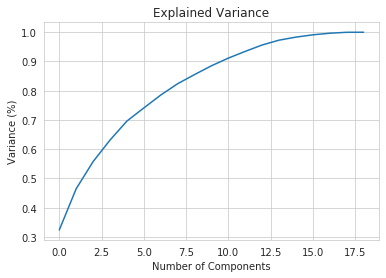

In [64]:
pca = PCA().fit(X)
#Plotting the Cumulative Summation of the Explained Variance
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Explained Variance')
plt.show()


In [65]:
#feature Extraction
pca = PCA(n_components=15)
fit = pca.fit_transform(X)
# pc stands for Principal Component
fitDf = pd.DataFrame(data = fit,columns = ['pc1','pc2','pc3','pc4','pc5','pc6','pc7','pc8','pc9','pc10','pc11','pc12','pc13','pc14','pc15'])
pca_df = pd.concat([fitDf,df[['Life_Expectancy']]],axis=1)
pca_df.head()

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,pc11,pc12,pc13,pc14,pc15,Life_Expectancy
0,3.994739,0.279798,0.633008,-0.043511,-1.405096,0.339034,-2.440940,-1.329092,0.290832,-1.479700,0.766475,-0.074226,-1.132177,-1.574682,0.290938,65.0
1,3.752075,0.079289,-0.131003,0.605608,-1.269728,0.417796,-2.344873,-1.419838,0.488246,-0.287543,-0.046268,-0.006397,-1.086502,-0.130110,0.061079,59.9
2,3.794247,0.344326,-0.321520,0.671414,-1.182584,0.363753,-2.447097,-1.059037,0.364148,-0.246484,0.229644,-0.157924,-1.164590,-0.049917,0.040376,59.9
3,3.751495,0.235957,-0.500034,0.861619,-1.138469,0.643295,-2.294631,-1.437158,0.518432,-0.150040,-0.018051,-0.066495,-1.158453,-0.013412,0.025937,59.5
4,3.888355,0.236556,-0.636188,0.878918,-1.238843,0.535395,-2.137902,-1.395753,0.451457,-0.133737,-0.102959,-0.125063,-1.155148,-0.028267,0.000884,59.2


## Linear Regression

In [66]:
# Performs linear regression based on the selected features
def linear_regression(c,features):
    new_data = pca_df[features]
    X = new_data.values
    y = normal_df.Life_Expectancy.values
    LR = LinearRegression()
    avg_train_acc =0 
    avg_test_acc =0
    avg_train_rms =0 
    avg_test_rms =0
    avg_train_mae =0 
    avg_test_mae =0
    avg_train_mse =0 
    avg_test_mse =0
    max_train =0
    max_test =0
    max_pred =0
    max_y_test = []
    #split
    for n in range(0,10000):
        X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = n)
        LR.fit(X_train,y_train)
        predictions_train = LR.predict(X_train)
        predictions_test = LR.predict(X_test)
        if(r2_score(y_train,predictions_train)>=max_train):
            max_train = r2_score(y_train,predictions_train)
        if(r2_score(y_test,predictions_test)>= max_test):
            max_test = r2_score(y_test,predictions_test)
            
        avg_train_acc = avg_train_acc + r2_score(y_train,predictions_train)
        avg_test_acc = avg_test_acc + r2_score(y_test,predictions_test)
        
        avg_train_rms = avg_train_rms+ np.sqrt(metrics.mean_squared_error(predictions_train,y_train))
        avg_test_rms = avg_test_rms+ np.sqrt(metrics.mean_squared_error(predictions_test,y_test))
        
        avg_train_mae = avg_train_mae+ metrics.mean_absolute_error(predictions_train,y_train)
        avg_test_mae = avg_test_mae+ metrics.mean_absolute_error(predictions_test,y_test)
        
        avg_train_mse = avg_train_mse+ metrics.mean_squared_error(predictions_train,y_train)
        avg_test_mse = avg_test_mse+ metrics.mean_squared_error(predictions_test,y_test)
        
    avg_train_acc = avg_train_acc/10000
    avg_test_acc = avg_test_acc/10000
    avg_train_rms = avg_train_rms/10000
    avg_test_rms = avg_test_rms/10000
    avg_train_mae = avg_train_mae/10000
    avg_test_mae = avg_test_mae/10000
    avg_train_mse = avg_train_mse/10000
    avg_test_mse = avg_test_mse/10000
    
    print("ON TRAIN DATA:")
    print("Avg train accuracy: {:.3f}".format(avg_train_acc))
    print("max train accuracy: {:.3f}".format(max_train))
    print("Root Mean Squared Error: {:.3f}".format(avg_train_rms))
    print("Mean Absolute Error: {:.3f}" .format(avg_train_mae))
    print("Mean Squared Error: {:.3f}" .format(avg_train_mse))
    print("ON TEST DATA:")
    print("Avg test accuracy: {:.3f}".format(avg_test_acc))
    print("max test accuracy: {:.3f}".format(max_test))
    print("Root Mean Squared Error: {:.3f}".format(avg_test_rms))
    print("Mean Absolute Error: {:.3f}" .format(avg_test_mae))
    print("Mean Squared Error: {:.3f}" .format(avg_test_mse))
    plt.scatter(predictions,y_test)
#     y_head = linear_reg.predict(x_array)                              
#     plt.plot(X_test,predictions,color="red")
#     plt.show()

In [67]:
linear_regression(1,['pc1','pc2','pc3','pc4','pc5','pc6','pc7','pc8','pc9','pc10','pc11','pc12','pc13','pc14','pc15'])

ON TRAIN DATA:
Avg train accuracy: 0.894
max train accuracy: 0.903
Root Mean Squared Error: 0.325
Mean Absolute Error: 0.242
Mean Squared Error: 0.105
ON TEST DATA:
Avg test accuracy: 0.892
max test accuracy: 0.922
Root Mean Squared Error: 0.328
Mean Absolute Error: 0.244
Mean Squared Error: 0.108


NameError: name 'predictions' is not defined

Avg train accuracy: 0.894
Avg test accuracy: 0.892
max train accuracy: 0.903
max test accuracy: 0.922

Root Mean Squared Error: 0.3379201761516669 
Mean Absolute Error:  0.2450750650067222
Mean Squared Error:  0.1141900454503736
0.8733038354075073
without measles

Root Mean Squared Error: 0.3379312328288971
Mean Absolute Error:  0.24551832733702075
Mean Squared Error:  0.11419751812125824
0.8732955443280475
with measles

## Polynomial Regression

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
def poly_regression(features):
    new_data = pca_df[features]
    X = new_data.values
    y = normal_df.Life_Expectancy.values
    LR = LinearRegression()
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 5)
#     LR.fit(X,y)
    poly = PolynomialFeatures(degree=3)
    poly.fit(X_train)
    X_train_cubic = poly.transform(X_train)
    X_test_cubic = poly.transform(X_test)
    poly_LR = LinearRegression()
    poly_LR.fit(X_train_cubic,y_train)
    poly_pred = poly_LR.predict(X_test_cubic)
    print("Mean squared error: %.2f"
      % mean_squared_error(y_test, poly_pred))
    print("Mean absolute error: %.2f"
          % mean_absolute_error(y_test, poly_pred))
    print('R_square score: %.2f' % r2_score(y_test, poly_pred))
#     X_poly = poly.fit_transform(X)
#     poly.fit(X_poly,y)
#     LR2 = LinearRegression()
#     LR2.fit(X_poly, y)
#     plt.scatter(X, y, color = 'blue')
#     plt.plot(X, lin.predict(X), color = 'red')

In [ ]:
poly_regression(['pc1','pc2','pc3','pc4','pc5','pc6','pc7','pc8','pc9','pc10','pc11','pc12','pc13','pc14','pc15'])

### result 
negative r_sq score means the worst model

## Random Forest Regression

In [ ]:
from sklearn.ensemble import RandomForestRegressor 
from sklearn.metrics import make_scorer
from sklearn.model_selection import KFold

In [ ]:
def randomforest_reg(features):
    new_data = pca_df[features]
    X = new_data.values
    y = normal_df.Life_Expectancy.values
    random_forest_model = RandomForestRegressor()
    avg_train_mcvs = 0
    avg_train_r2 = 0
    avg_test_mcvs = 0
    avg_test_r2 = 0
    for n in range(0,50):
        X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = n)
        random_forest_fit = random_forest_model.fit(X_train, y_train)
        random_forest_score = cross_val_score(random_forest_fit, X_train, y_train, cv = 5)
        random_forest_model_predict = random_forest_model.predict(X_test)
        avg_mcvs = avg_mcvs + np.mean(random_forest_score)
        avg_r2 = avg_r2 + r2_score(y_test, random_forest_fit.predict(X_test))
    avg_mcvs = avg_mcvs/50
    avg_r2 = avg_r2/50
    print("mean cross validation score: %.2f" 
           % avg_mcvs)
    print("R^2 score on the test data %.2f"
          %avg_r2)
    
#     result = grid_cv.cv_results_
#     print("R^2 score on training data: %.2f"  % grid_cv.best_estimator_.score(X_train, y_train))
#     print("R^2 score: %.2f" 
#           % r2_score(y_test, grid_cv.best_estimator_.predict(X_test)))
#     print("Mean squared error: %.2f"
#           % mean_squared_error(y_test, random_forest_model_predict))
#     print("Mean absolute error: %.2f"
#           % mean_absolute_error(y_test, random_forest_model_predict))

In [ ]:
randomforest_reg(['pc1','pc2','pc3','pc4','pc5','pc6','pc7','pc8','pc9','pc10','pc11','pc12','pc13','pc14','pc15'])